In [1]:
import sys
import os
# Get parent of current working directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
# Add it to sys.path
sys.path.insert(0, parent_dir)

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from StlData import StlData
from WaveletTransform import Wavelet_Operator

shape data = (256, 256)
shape data_full = (20, 256, 256)


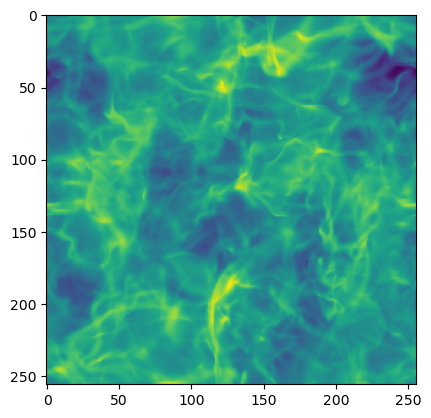

In [4]:
# Load some data
data_full = np.load("Turb_6.npy")
data = data_full[0]
print("shape data = " + str(data.shape))
print("shape data_full = " + str(data_full.shape))
plt.imshow(data)

In [4]:
# Initialization of StlData for MR=False
DT = "DT1"
stl_data = StlData(DT, data)

In [5]:
# Construct the wavelet operator
Wave_Op = Wavelet_Operator(stl_data.DT, stl_data.N0)

In [6]:
# Check the wavelet operator parameters
print("For Wave_Op:")
print("DT = " + str(Wave_Op.DT))
print("N0 = " + str(Wave_Op.N0))
print("J = " + str(Wave_Op.J))
print("L = " + str(Wave_Op.L))
print("WType = " + str(Wave_Op.WType))
print("Type wavelet_array = " + str(type(Wave_Op.wavelet_array)))
print("Shape wavelet_array = " + str(Wave_Op.wavelet_array.shape))
print("Type wavelet_array_MR = " + str(type(Wave_Op.wavelet_array_MR)))
print("dg_max = " + str(Wave_Op.dg_max))
print("j_to_dg = " + str(Wave_Op.j_to_dg))
print("Single_Kernel = " + str(Wave_Op.Single_Kernel))
print("mask_opt = " + str(Wave_Op.mask_opt))

# Fix J and L values
J = Wave_Op.J
L = Wave_Op.L

For Wave_Op:
DT = DT1
N0 = (256, 256)
J = 6
L = 4
WType = Crappy
Type wavelet_array = <class 'torch.Tensor'>
Shape wavelet_array = torch.Size([6, 4, 256, 256])
Type wavelet_array_MR = <class 'list'>
dg_max = 4
j_to_dg = [0, 1, 2, 3, 4, 4]
Single_Kernel = False
mask_opt = False


In [7]:
# Check the wavelet wavelet_array_MR structure
print("Len of wavelet_array_MR = " + str(len(Wave_Op.wavelet_array_MR)))
for j in range(J):
    print("Shape wavelet_array_MR for j=" + str(j) + " is " + str(Wave_Op.wavelet_array_MR[j].shape))


Len of wavelet_array_MR = 6
Shape wavelet_array_MR for j=0 is torch.Size([4, 256, 256])
Shape wavelet_array_MR for j=1 is torch.Size([4, 128, 128])
Shape wavelet_array_MR for j=2 is torch.Size([4, 64, 64])
Shape wavelet_array_MR for j=3 is torch.Size([4, 32, 32])
Shape wavelet_array_MR for j=4 is torch.Size([4, 16, 16])
Shape wavelet_array_MR for j=5 is torch.Size([4, 16, 16])


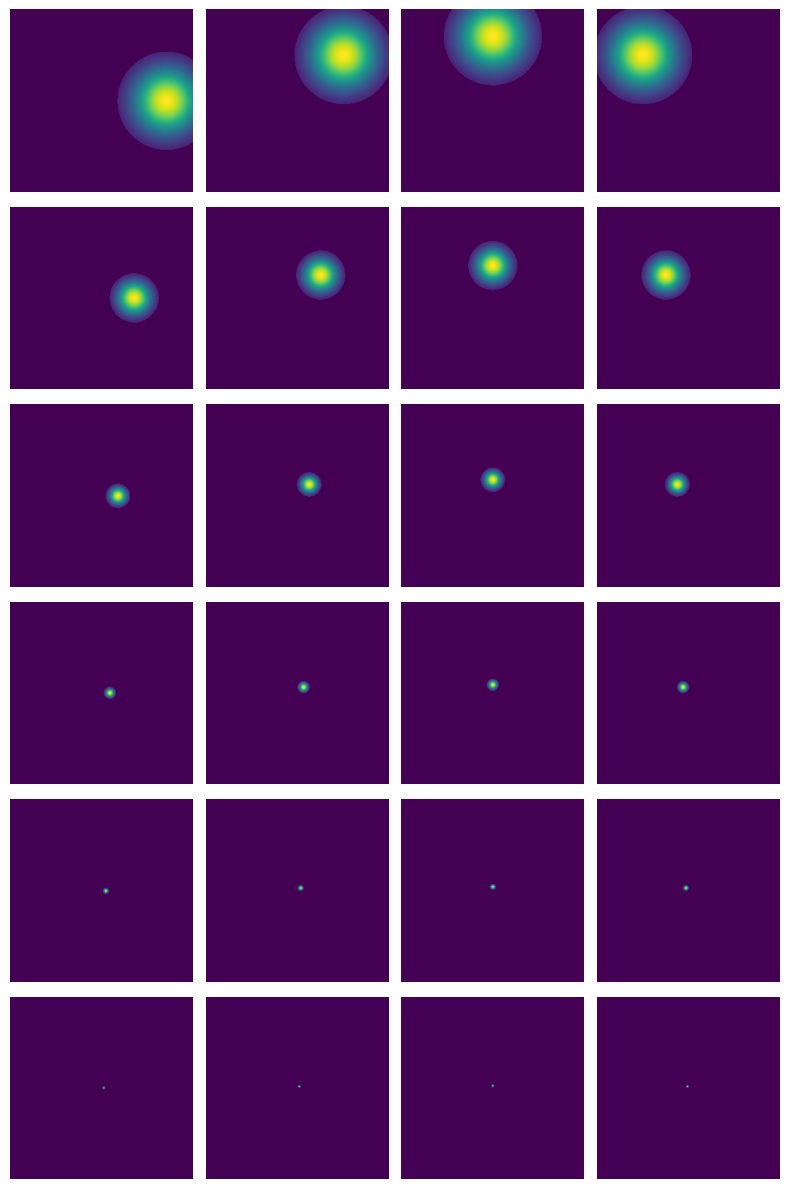

In [8]:
# Plot the wavelet set in Fourier, with fftshift
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow(torch.fft.fftshift(Wave_Op.wavelet_array[j, l], dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()

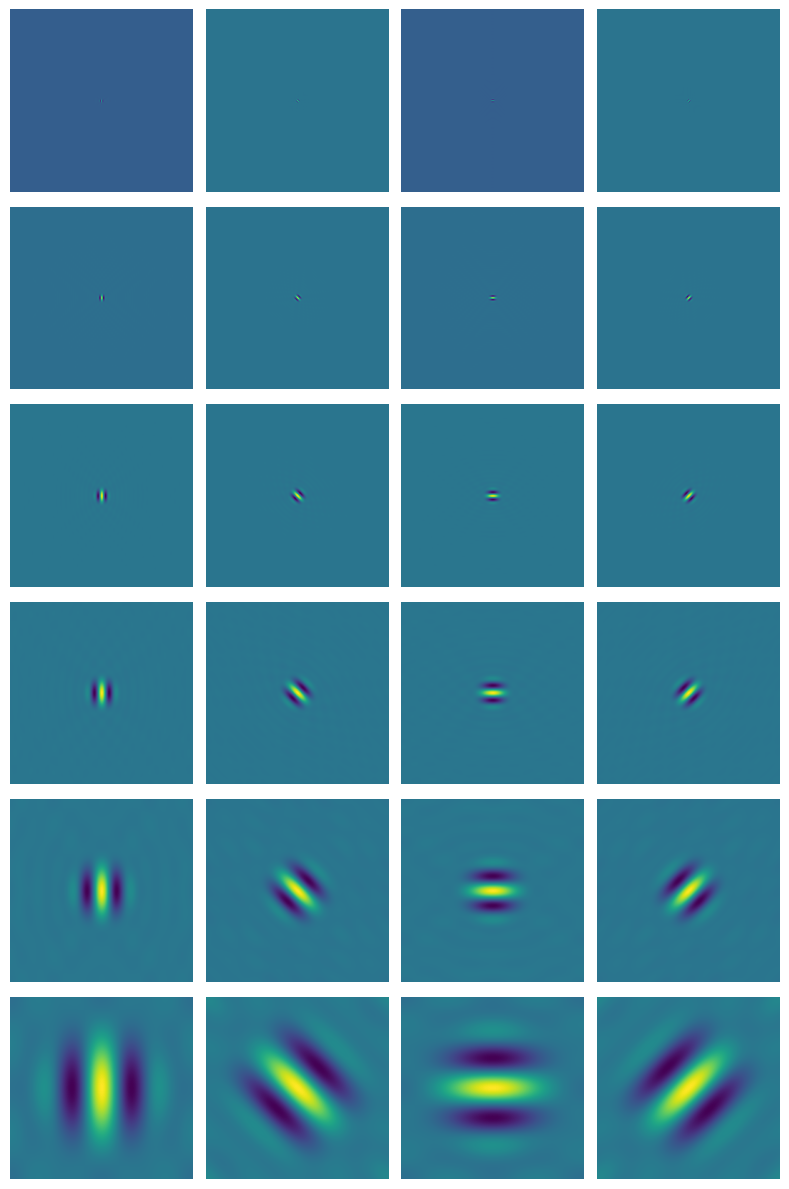

In [9]:
# Plot the wavelet set in real space, with fftshift
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow( torch.fft.fftshift(
            torch.fft.fft2(Wave_Op.wavelet_array[j, l]).real
                  , dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()

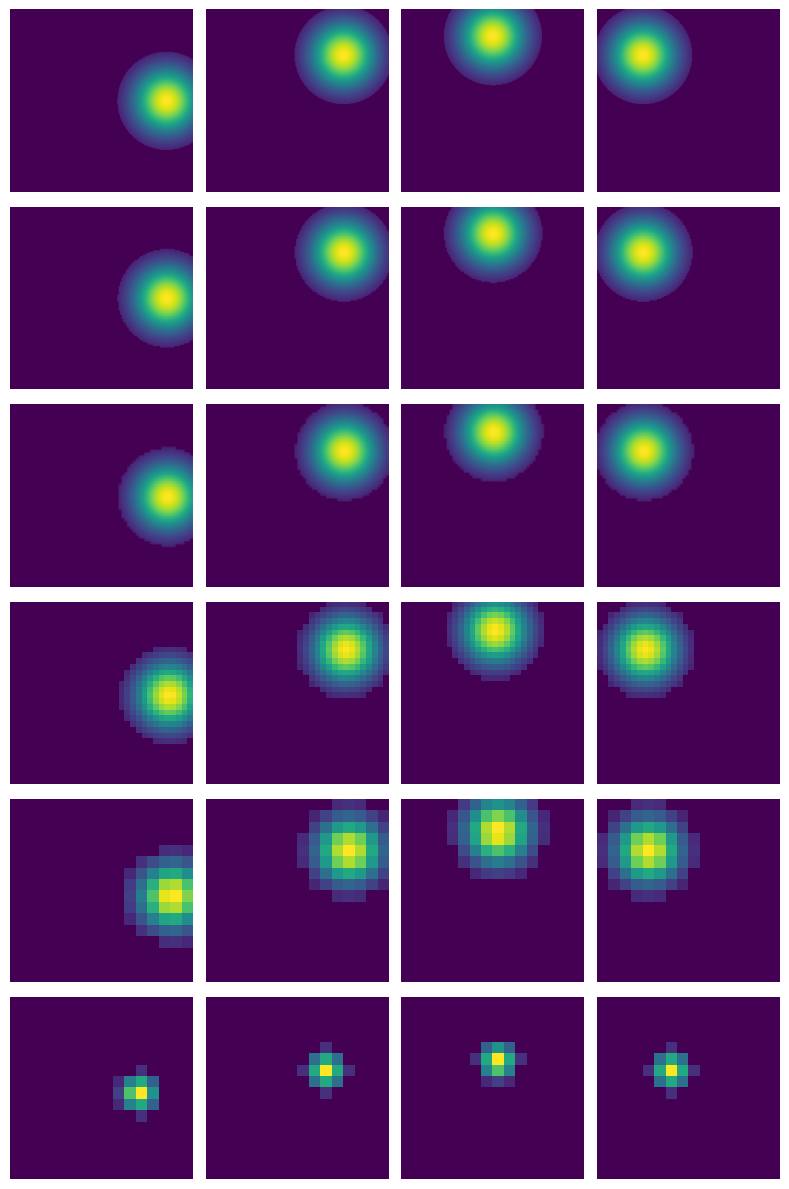

In [10]:
# Plot the MR wavelet set in Fourier, with fftshift
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow(torch.fft.fftshift(Wave_Op.wavelet_array_MR[j][l], dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()

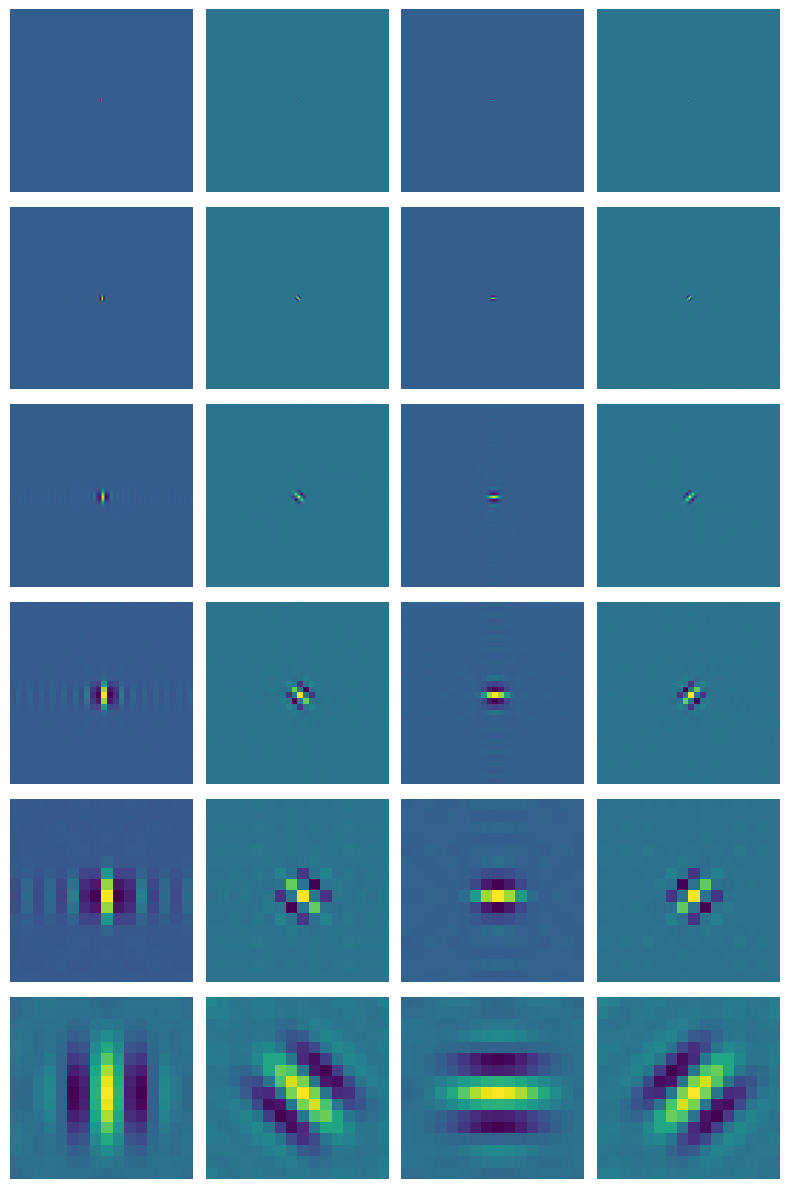

In [11]:
# Plot the MR wavelet set in real space, with fftshift
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow( torch.fft.fftshift(
            torch.fft.fft2(Wave_Op.wavelet_array_MR[j][l]).real
                  , dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()

In [12]:
# Initialization of StlData for MR=False
DT = "DT1"
stl_data2 = StlData(DT, data[:187, :249])

In [13]:
# Construct the wavelet operator
Wave_Op = Wavelet_Operator(stl_data2.DT, stl_data2.N0)

In [14]:
# Check the wavelet operator parameters
print("For Wave_Op:")
print("DT = " + str(Wave_Op.DT))
print("N0 = " + str(Wave_Op.N0))
print("J = " + str(Wave_Op.J))
print("L = " + str(Wave_Op.L))
print("WType = " + str(Wave_Op.WType))
print("Type wavelet_array = " + str(type(Wave_Op.wavelet_array)))
print("Shape wavelet_array = " + str(Wave_Op.wavelet_array.shape))
print("Type wavelet_array_MR = " + str(type(Wave_Op.wavelet_array_MR)))
print("dg_max = " + str(Wave_Op.dg_max))
print("j_to_dg = " + str(Wave_Op.j_to_dg))
print("Single_Kernel = " + str(Wave_Op.Single_Kernel))
print("mask_opt = " + str(Wave_Op.mask_opt))

# Fix J and L values
J = Wave_Op.J
L = Wave_Op.L

For Wave_Op:
DT = DT1
N0 = (187, 249)
J = 5
L = 4
WType = Crappy
Type wavelet_array = <class 'torch.Tensor'>
Shape wavelet_array = torch.Size([5, 4, 187, 249])
Type wavelet_array_MR = <class 'list'>
dg_max = 3
j_to_dg = [0, 1, 2, 3, 3]
Single_Kernel = False
mask_opt = False


In [15]:
# Check the wavelet wavelet_array_MR structure
print("Len of wavelet_array_MR = " + str(len(Wave_Op.wavelet_array_MR)))
for j in range(J):
    print("Shape wavelet_array_MR for j=" + str(j) + " is " + str(Wave_Op.wavelet_array_MR[j].shape))


Len of wavelet_array_MR = 5
Shape wavelet_array_MR for j=0 is torch.Size([4, 187, 249])
Shape wavelet_array_MR for j=1 is torch.Size([4, 92, 124])
Shape wavelet_array_MR for j=2 is torch.Size([4, 46, 62])
Shape wavelet_array_MR for j=3 is torch.Size([4, 22, 30])
Shape wavelet_array_MR for j=4 is torch.Size([4, 22, 30])


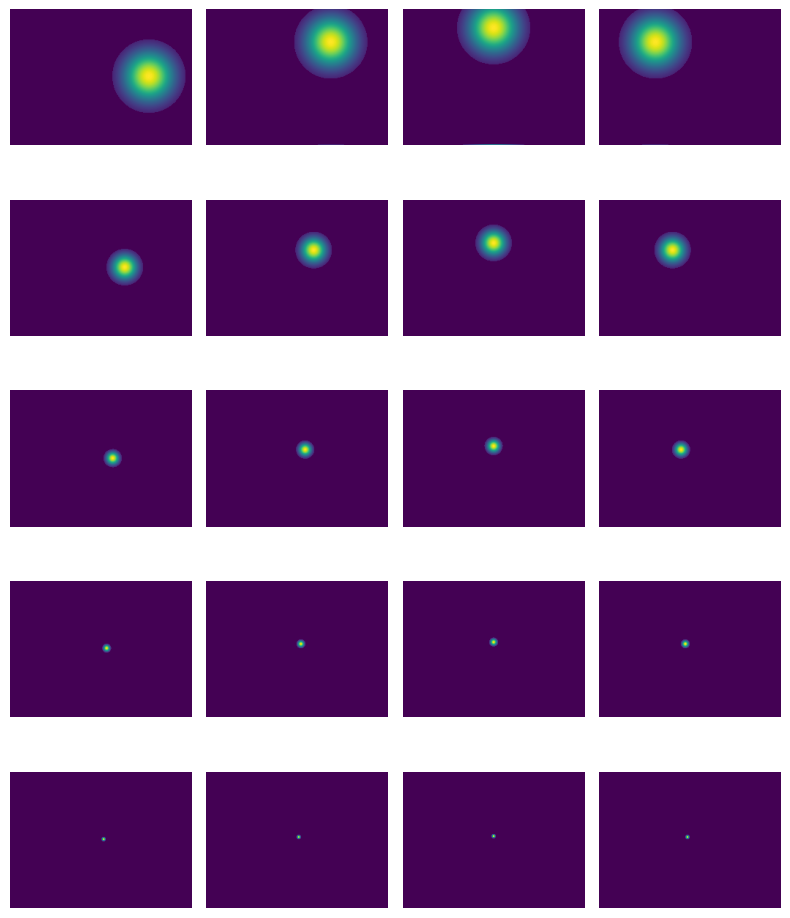

In [16]:
# Plot the wavelet set in Fourier, with fftshift
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow(torch.fft.fftshift(Wave_Op.wavelet_array[j, l], dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()

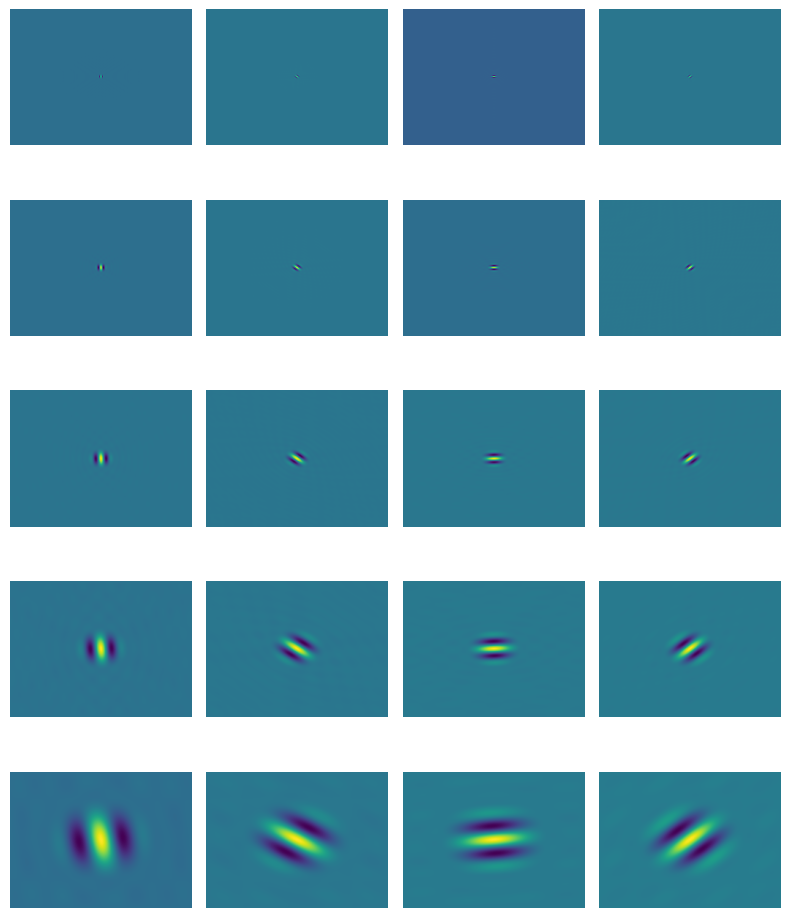

In [17]:
# Plot the wavelet set in real space, with fftshift
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow( torch.fft.fftshift(
            torch.fft.fft2(Wave_Op.wavelet_array[j, l]).real
                  , dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()

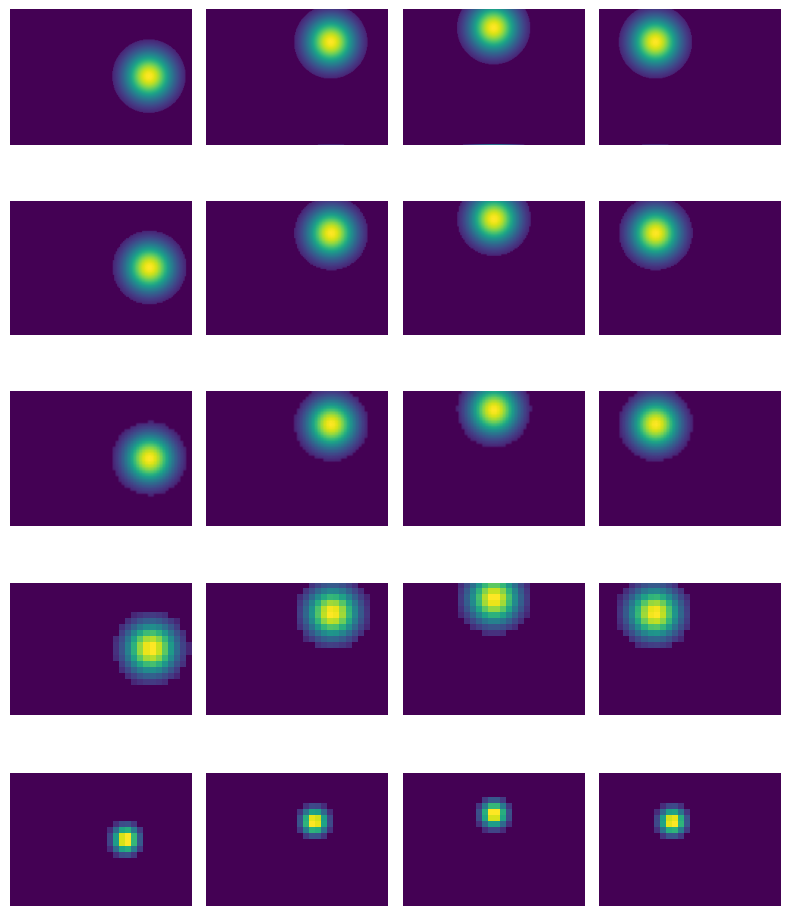

In [18]:
# Plot the MR wavelet set in Fourier, with fftshift
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow(torch.fft.fftshift(Wave_Op.wavelet_array_MR[j][l], dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()

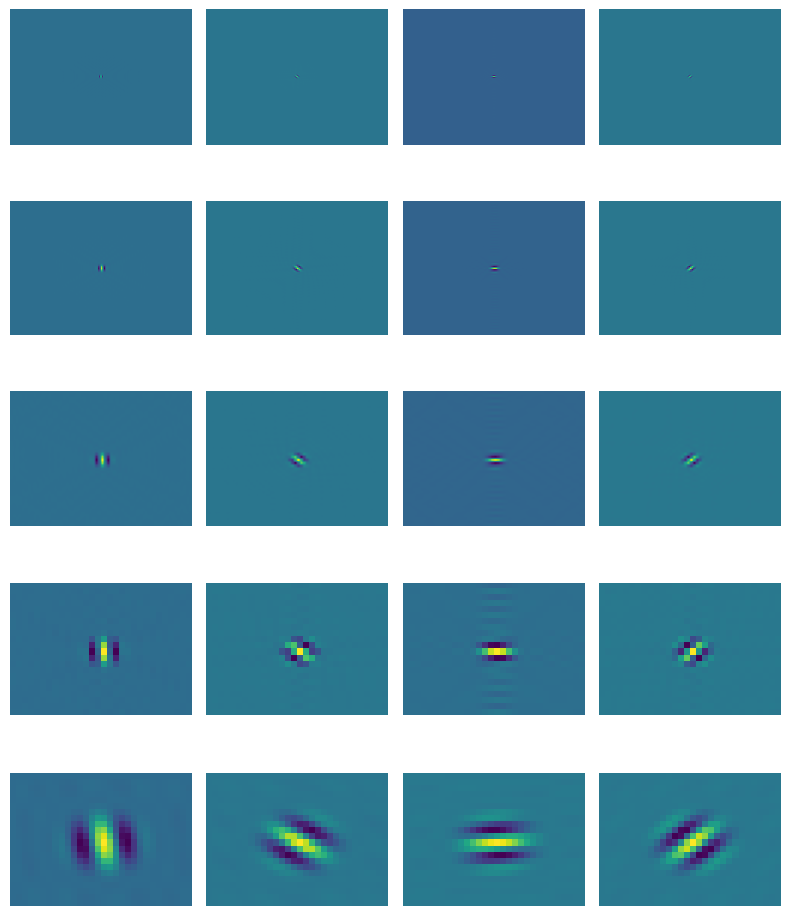

In [19]:
# Plot the MR wavelet set in real space, with fftshift
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow( torch.fft.fftshift(
            torch.fft.fft2(Wave_Op.wavelet_array_MR[j][l]).real
                  , dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()

## Load data and create StlData object

shape data = (256, 256)
shape data_full = (20, 256, 256)


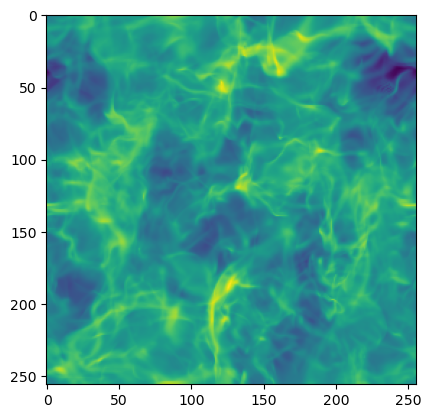

In [21]:
# Load some data
data_full = np.load("Turb_6.npy")
data = data_full[0]
print("shape data = " + str(data.shape))
print("shape data_full = " + str(data_full.shape))
plt.imshow(data)

In [22]:
# Initialization of StlData for MR=False
DT = "DT1"
stl_data = StlData(DT, data)

In [23]:
# Construct the wavelet operator
Wave_Op = Wavelet_Operator(stl_data.DT, stl_data.N0)

## Full Conv in MR=False

In [25]:
# Compute the wavelet transform
WT = Wave_Op.apply(stl_data)

In [26]:
# Test of WT parameters 
print("For stl_data:")
print("DT = " + str(WT.DT))
print("MR = " + str(WT.MR))
print("dg = " + str(WT.dg))
print("N0 = " + str(WT.N0))
print("list_dg = " + str(WT.list_dg))
print("Fourier = " + str(WT.Fourier))
print("Type array = " + str(type(WT.array)))
print("Size array = " + str(WT.array.shape))

For stl_data:
DT = DT1
MR = False
dg = 0
N0 = (256, 256)
list_dg = None
Fourier = True
Type array = <class 'torch.Tensor'>
Size array = torch.Size([6, 4, 256, 256])


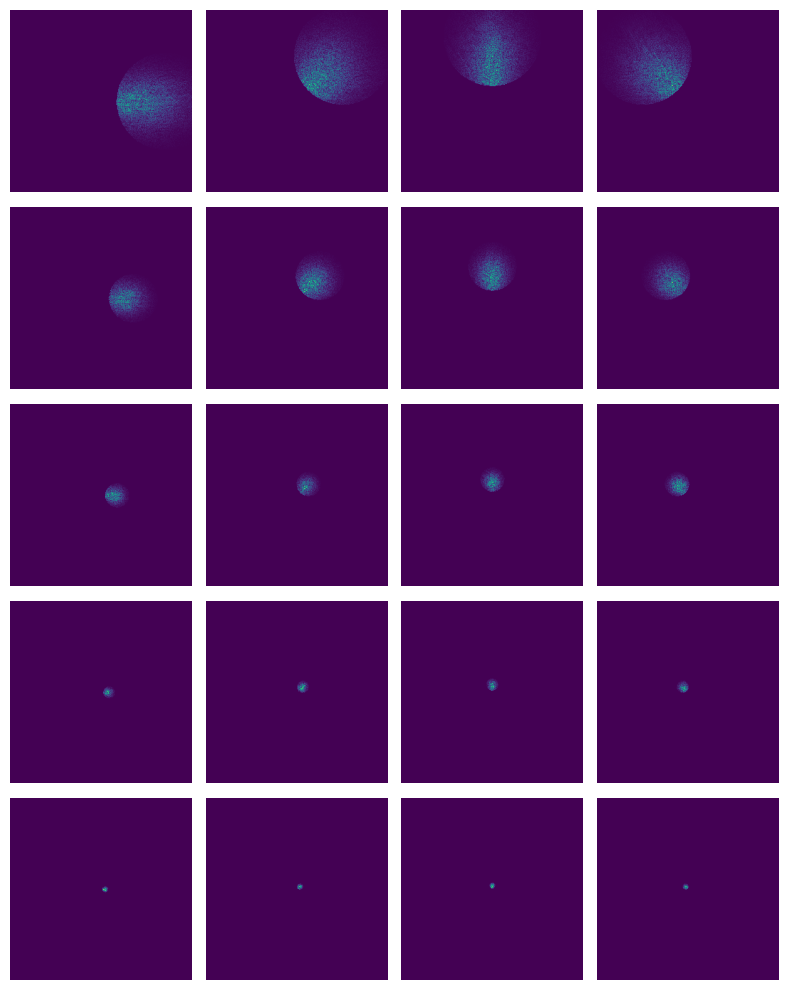

In [27]:
# Plot in Fourier space
WT.out_fourier(True)

# Plot the wavelet transform
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow(torch.fft.fftshift(WT.array[j, l].abs(), dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()

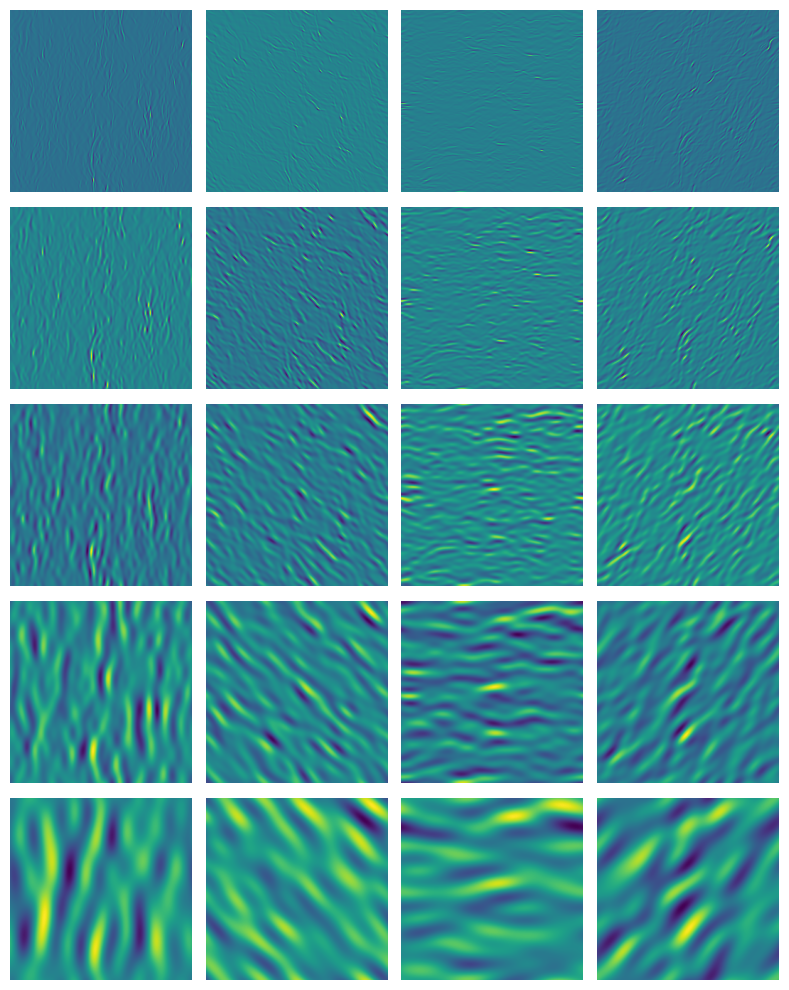

In [28]:
# Plot in real space
WT.out_fourier(False)

# Plot the wavelet transform
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow(WT.array[j, l])
        ax.axis('off')

plt.tight_layout()
plt.show()

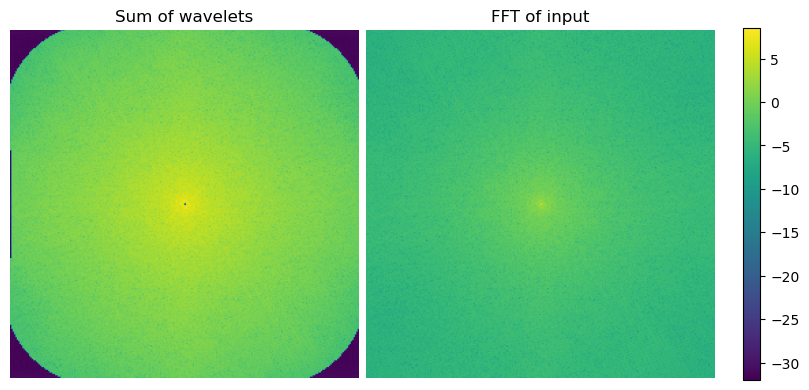

In [29]:
# Compare the abs of the Fourier Transform of data and of the sum of the convolved fields
# Note that doing Fourier -> real -> Fourier duplicates the Fourier support of the wavelets (k -> -k)
WT.out_fourier(True) 
stl_data.out_fourier(True)

# Compute the images
img1 = torch.fft.fftshift(torch.log(WT.array.abs().sum(dim=(0,1))), dim=(-2,-1)).numpy()
img2 = torch.fft.fftshift(torch.log(stl_data.array.abs()), dim=(-2,-1)).numpy()

# Compute global vmin and vmax for consistent color scale
vmin = min(img1.min(), img2.min())
vmax = max(img1.max(), img2.max())

# Plot
fig, axs = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)

im1 = axs[0].imshow(img1, vmin=vmin, vmax=vmax)
axs[0].set_title('Sum of wavelets')
axs[0].axis('off')

im2 = axs[1].imshow(img2, vmin=vmin, vmax=vmax)
axs[1].set_title('FFT of input')
axs[1].axis('off')

# Add a single shared colorbar
fig.colorbar(im1, ax=axs, orientation='vertical', fraction=0.025, pad=0.04)
plt.show()

## Full Conv in MR=True

In [31]:
# Create MR data
stl_data_MR = stl_data.downsample_toMR(Wave_Op.dg_max)
print("For stl_data_MR:")
print("DT = " + str(stl_data_MR.DT))
print("MR = " + str(stl_data_MR.MR))
print("dg = " + str(stl_data_MR.dg))
print("N0 = " + str(stl_data_MR.N0))
print("list_dg = " + str(stl_data_MR.list_dg))
print("Fourier = " + str(stl_data_MR.Fourier))
print("Type array = " + str(type(stl_data_MR.array)))
print("Size array = " + str(stl_data_MR.array[0].shape))

For stl_data_MR:
DT = DT1
MR = True
dg = None
N0 = (256, 256)
list_dg = [0, 1, 2, 3, 4]
Fourier = True
Type array = <class 'list'>
Size array = torch.Size([256, 256])


In [32]:
# Compute the wavelet transform
WT_MR = Wave_Op.apply(stl_data_MR, MR=True)

In [33]:
# Test of WT_MR parameters 
print("For WT_MR:")
print("DT = " + str(WT_MR.DT))
print("MR = " + str(WT_MR.MR))
print("dg = " + str(WT_MR.dg))
print("N0 = " + str(WT_MR.N0))
print("list_dg = " + str(WT_MR.list_dg))
print("Fourier = " + str(WT_MR.Fourier))
print("Type array = " + str(type(WT_MR.array)))
print("Size array = " + str(WT_MR.array[0].shape))

For WT_MR:
DT = DT1
MR = True
dg = None
N0 = (256, 256)
list_dg = [0, 1, 2, 3, 4, 4]
Fourier = True
Type array = <class 'list'>
Size array = torch.Size([4, 256, 256])


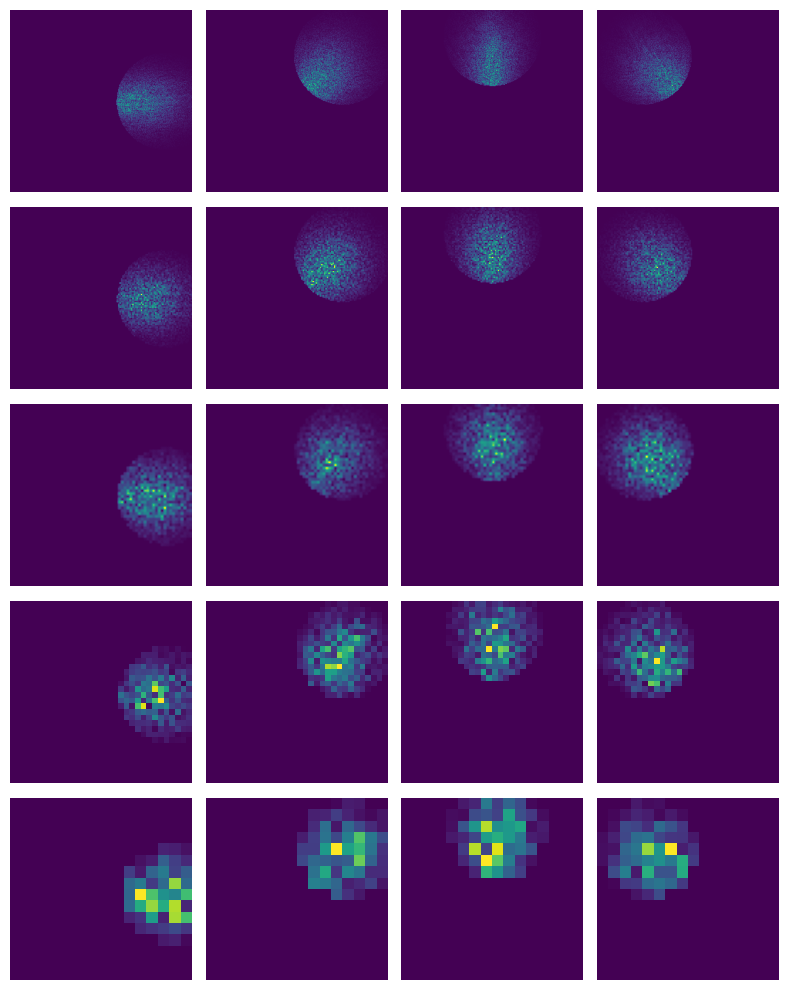

In [34]:
# Plot in Fourier space
WT_MR.out_fourier(True)

# Plot the wavelet transform
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow(torch.fft.fftshift(WT_MR.array[j][l].abs(), dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()

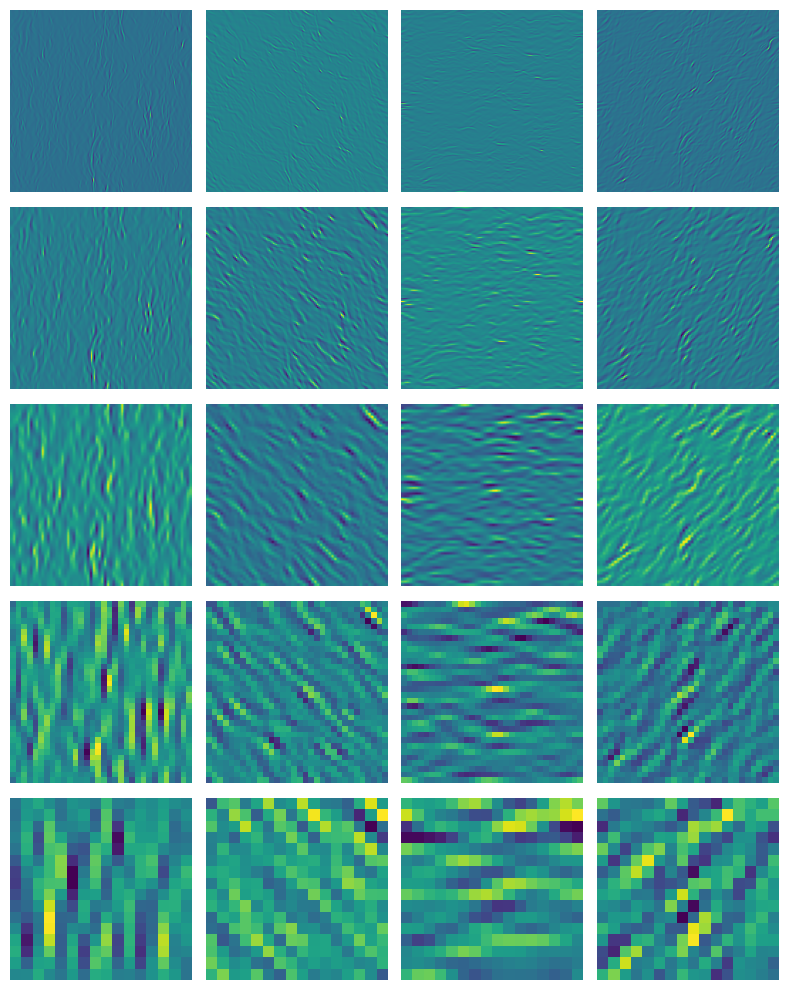

In [35]:
# Plot in real space
WT_MR.out_fourier(False)

# Plot the wavelet transform
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow(WT_MR.array[j][l])
        ax.axis('off')

plt.tight_layout()
plt.show()

## Scale by scale convolution in MR=True

In [37]:
j = 3

In [38]:
# Create MR data
stl_data_Nj = stl_data.downsample(Wave_Op.j_to_dg[j], copy=True)
print("For stl_data_Nj:")
print("DT = " + str(stl_data_Nj.DT))
print("MR = " + str(stl_data_Nj.MR))
print("dg = " + str(stl_data_Nj.dg))
print("N0 = " + str(stl_data_Nj.N0))
print("list_dg = " + str(stl_data_Nj.list_dg))
print("Fourier = " + str(stl_data_Nj.Fourier))
print("Type array = " + str(type(stl_data_Nj.array)))
print("Size array = " + str(stl_data_Nj.array.shape))

For stl_data_Nj:
DT = DT1
MR = False
dg = 3
N0 = (256, 256)
list_dg = None
Fourier = True
Type array = <class 'torch.Tensor'>
Size array = torch.Size([32, 32])


In [39]:
# Compute the wavelet transform at scale j
WT_j = Wave_Op.apply(stl_data_Nj, j=j)
print("For WT_j:")
print("DT = " + str(WT_j.DT))
print("MR = " + str(WT_j.MR))
print("dg = " + str(WT_j.dg))
print("N0 = " + str(WT_j.N0))
print("list_dg = " + str(WT_j.list_dg))
print("Fourier = " + str(WT_j.Fourier))
print("Type array = " + str(type(WT_j.array)))
print("Size array = " + str(WT_j.array.shape))

For WT_j:
DT = DT1
MR = False
dg = 3
N0 = (256, 256)
list_dg = None
Fourier = True
Type array = <class 'torch.Tensor'>
Size array = torch.Size([4, 32, 32])


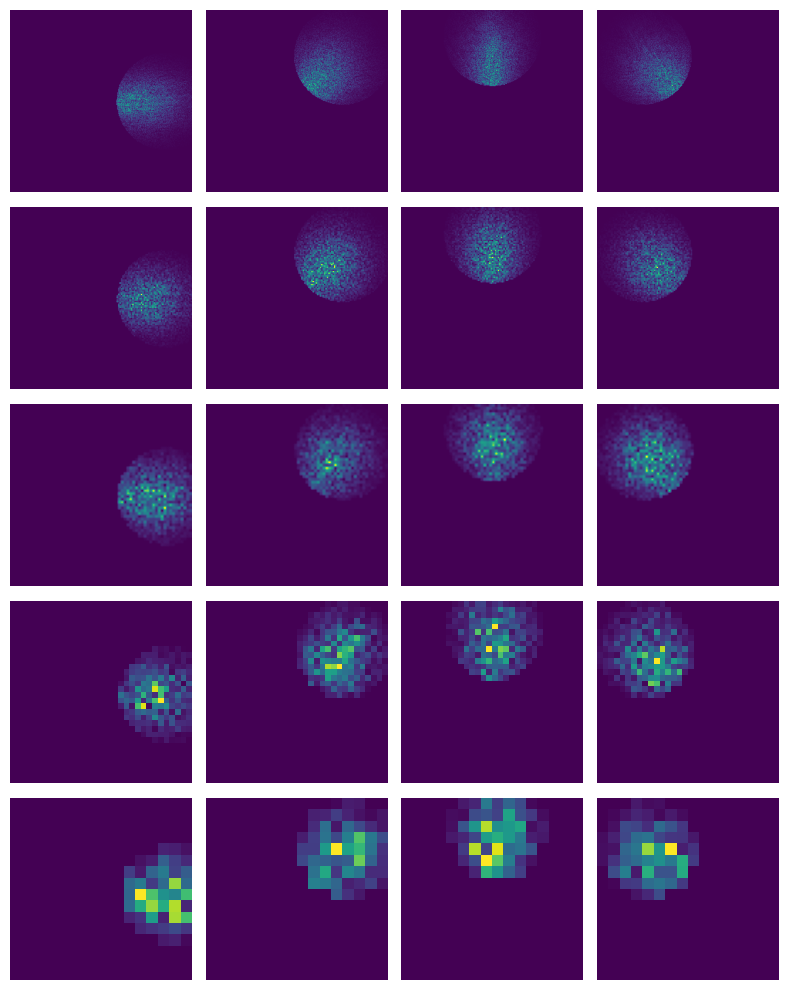

In [40]:
# Plot in Fourier space
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    stl_data_Nj = stl_data.downsample(Wave_Op.j_to_dg[j], copy=True)
    WT_j = Wave_Op.apply(stl_data_Nj, j=j)
    for l in range(L):
        ax = axs[j, l]
        ax.imshow(torch.fft.fftshift(WT_j.array[l].abs(), dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()

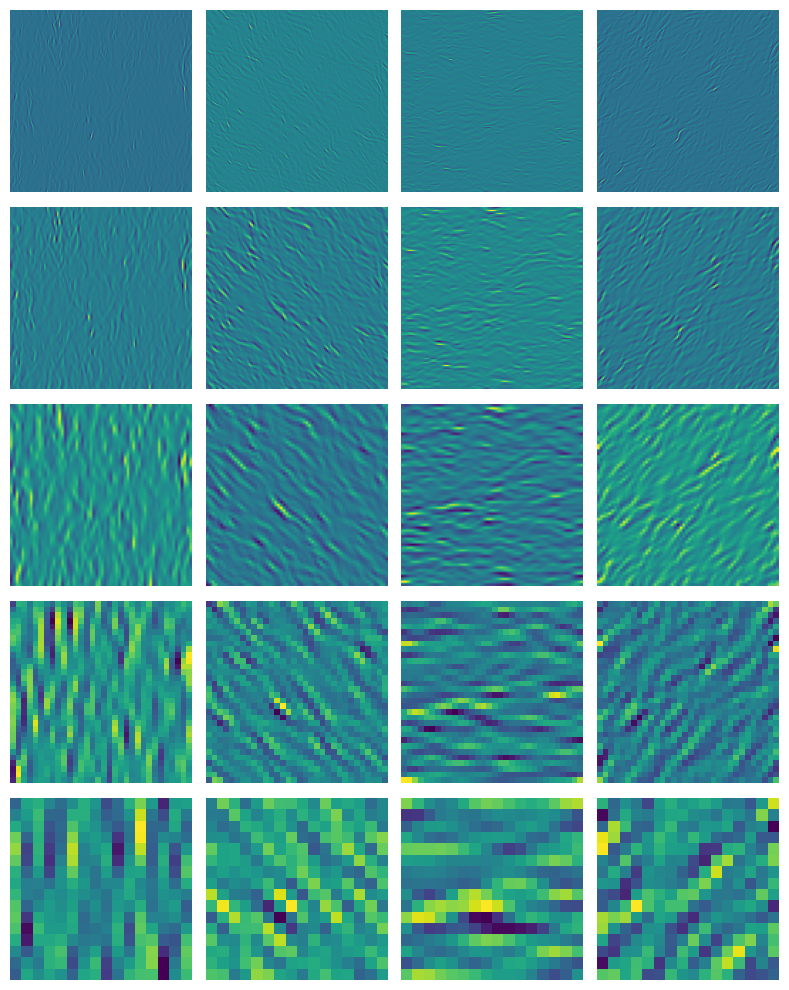

In [41]:
# Plot in real space
fig, axs = plt.subplots(J, L, figsize=(2 * L, 2 * J))
axs = axs.reshape(J, L)

for j in range(J):
    stl_data_Nj = stl_data.downsample(Wave_Op.j_to_dg[j], copy=True)
    WT_j = Wave_Op.apply(stl_data_Nj, j=j)
    WT_j.out_fourier(False)
    for l in range(L):
        ax = axs[j, l]
        ax.imshow(torch.fft.fftshift(WT_j.array[l], dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()

## Full Conv in MR=True with non-standard sizes

In [43]:
# Initialization of StlData for MR=False
DT = "DT1"
stl_data2 = StlData(DT, data[:187, :249])
# Construct the wavelet operator
Wave_Op2 = Wavelet_Operator(stl_data2.DT, stl_data2.N0)
J2 = Wave_Op2.J

In [44]:
# Create MR data
stl_data2_MR = stl_data2.downsample_toMR(Wave_Op2.dg_max)
print("For stl_data2_MR:")
print("DT = " + str(stl_data2_MR.DT))
print("MR = " + str(stl_data2_MR.MR))
print("dg = " + str(stl_data2_MR.dg))
print("N0 = " + str(stl_data2_MR.N0))
print("list_dg = " + str(stl_data2_MR.list_dg))
print("Fourier = " + str(stl_data2_MR.Fourier))
print("Type array = " + str(type(stl_data2_MR.array)))
print("Size array = " + str(stl_data2_MR.array[0].shape))

For stl_data2_MR:
DT = DT1
MR = True
dg = None
N0 = (187, 249)
list_dg = [0, 1, 2, 3]
Fourier = True
Type array = <class 'list'>
Size array = torch.Size([187, 249])


In [45]:
# Compute the wavelet transform
WT2_MR = Wave_Op2.apply(stl_data2_MR, MR=True)

In [46]:
# Test of WT_MR parameters 
print("For WT2_MR:")
print("DT = " + str(WT2_MR.DT))
print("MR = " + str(WT2_MR.MR))
print("dg = " + str(WT2_MR.dg))
print("N0 = " + str(WT2_MR.N0))
print("list_dg = " + str(WT2_MR.list_dg))
print("Fourier = " + str(WT2_MR.Fourier))
print("Type array = " + str(type(WT2_MR.array)))
print("Size array = " + str(WT2_MR.array[3].shape))

For WT2_MR:
DT = DT1
MR = True
dg = None
N0 = (187, 249)
list_dg = [0, 1, 2, 3, 3]
Fourier = True
Type array = <class 'list'>
Size array = torch.Size([4, 22, 30])


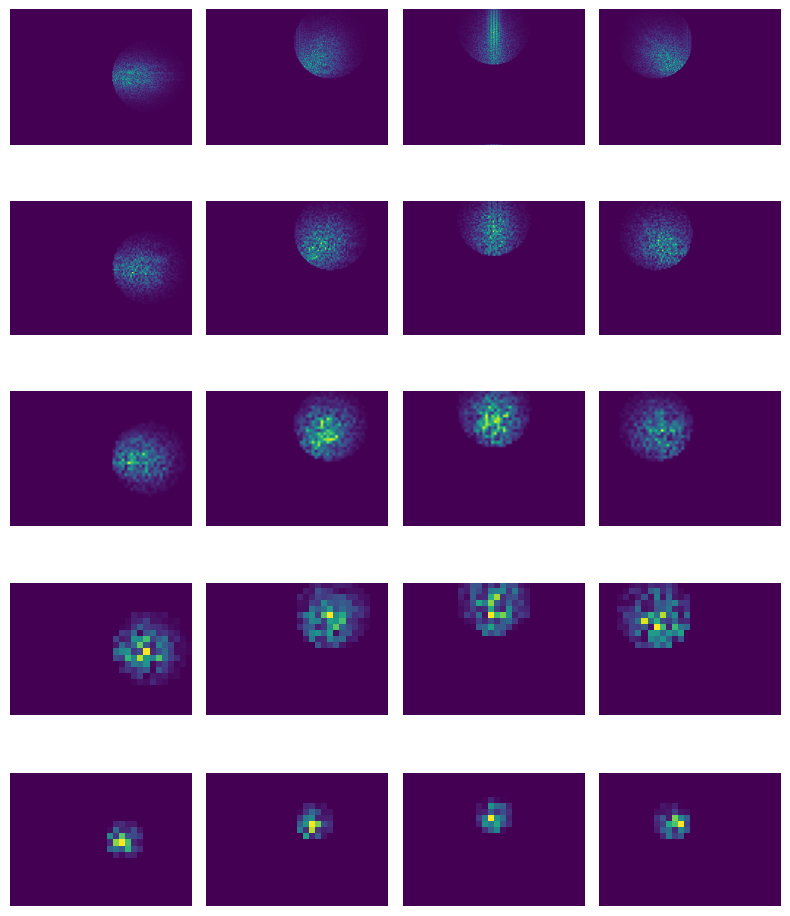

In [47]:
# Plot in Fourier space
WT2_MR.out_fourier(True)

# Plot the wavelet transform
fig, axs = plt.subplots(J2, L, figsize=(2 * L, 2 * J2))
axs = axs.reshape(J2, L)

for j in range(J2):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow(torch.fft.fftshift(WT2_MR.array[j][l].abs(), dim=(-2,-1)))
        ax.axis('off')

plt.tight_layout()
plt.show()

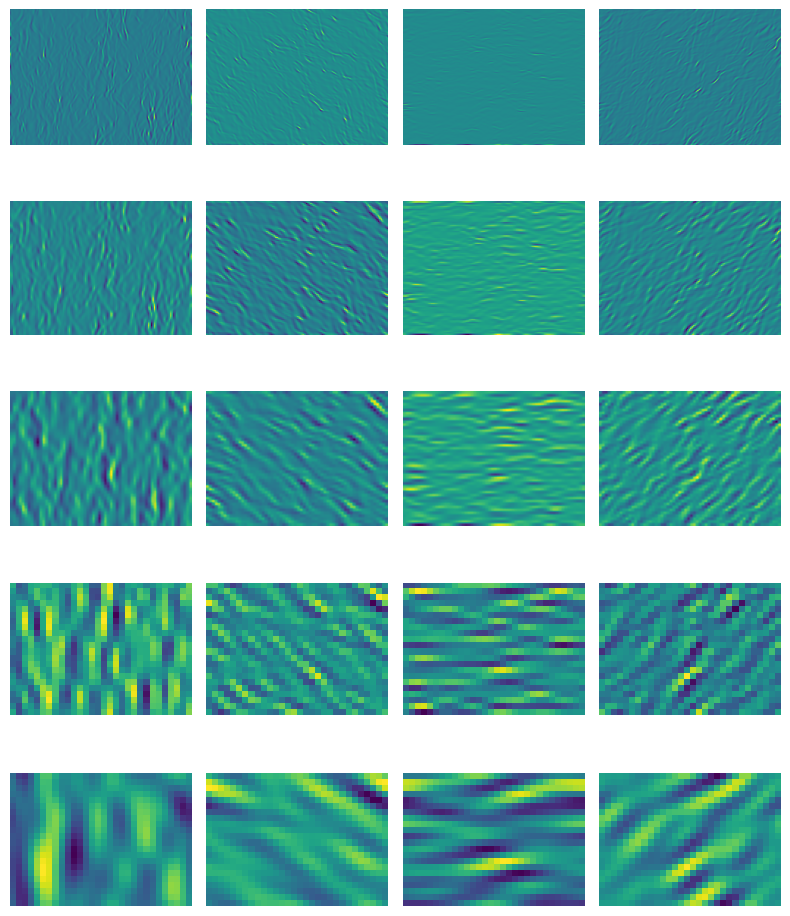

In [48]:
# Plot in real space
WT2_MR.out_fourier(False)

# Plot the wavelet transform
fig, axs = plt.subplots(J2, L, figsize=(2 * L, 2 * J2))
axs = axs.reshape(J2, L)

for j in range(J2):
    for l in range(L):
        ax = axs[j, l]
        ax.imshow(WT2_MR.array[j][l])
        ax.axis('off')

plt.tight_layout()
plt.show()